In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [5]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [6]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3).zip


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
!ls "/content/drive/MyDrive/datasets/NSL-KDD"
!ls "/content/drive/MyDrive/datasets/CICIDS"


index.html	 KDDTest-21.txt  KDDTrain1.jpg		   KDDTrain+.arff
KDDTest1.jpg	 KDDTest+.arff	 KDDTrain+_20Percent.arff  KDDTrain+.txt
KDDTest-21.arff  KDDTest+.txt	 KDDTrain+_20Percent.txt   nsl-kdd
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


In [13]:
import pandas as pd

# NSL-KDD
nsl_train = pd.read_csv("/content/drive/MyDrive/datasets/NSL-KDD/KDDTrain+.txt", header=None)
print("NSL-KDD Train shape:", nsl_train.shape)

# CICIDS (one file)
cicids_ddos = pd.read_csv("/content/drive/MyDrive/datasets/CICIDS/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
print("CICIDS DDoS shape:", cicids_ddos.shape)


NSL-KDD Train shape: (125973, 43)
CICIDS DDoS shape: (225745, 79)


In [20]:
print("\n--- NSL-KDD Info ---")
print(nsl_train.info())

print("\n--- CICIDS Info ---")
print(cicids_ddos.info())


--- NSL-KDD Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 

In [15]:
import pandas as pd

# === NSL-KDD ===
nsl_train = pd.read_csv("/content/drive/MyDrive/datasets/NSL-KDD/KDDTrain+.txt", header=None)
nsl_test  = pd.read_csv("/content/drive/MyDrive/datasets/NSL-KDD/KDDTest+.txt", header=None)

print("NSL-KDD Train shape:", nsl_train.shape)
print("NSL-KDD Test shape:", nsl_test.shape)

# === CICIDS (example: just load one CSV first) ===
cicids_ddos = pd.read_csv("/content/drive/MyDrive/datasets/CICIDS/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
print("CICIDS DDoS shape:", cicids_ddos.shape)


NSL-KDD Train shape: (125973, 43)
NSL-KDD Test shape: (22544, 43)
CICIDS DDoS shape: (225745, 79)


In [16]:
nsl_columns= (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])
nsl_train.columns = nsl_columns
nsl_test.columns = nsl_columns

print(nsl_train.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

In [17]:
def dataset_overview(df, name="Dataset"):
    print(f"\n===== {name} Overview =====")
    print("Shape:", df.shape)
    print("Columns:", df.columns[:10], "..." if len(df.columns) > 10 else "")
    print("\nData types:\n", df.dtypes.head())
    print("\nMissing values:\n", df.isnull().sum().head())
    print("\nClass distribution:\n", df.iloc[:, -1].value_counts().head(10))

dataset_overview(nsl_train, "NSL-KDD Train")
dataset_overview(cicids_ddos, "CICIDS DDoS Sample")



===== NSL-KDD Train Overview =====
Shape: (125973, 43)
Columns: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot'],
      dtype='object') ...

Data types:
 duration          int64
protocol_type    object
service          object
flag             object
src_bytes         int64
dtype: object

Missing values:
 duration         0
protocol_type    0
service          0
flag             0
src_bytes        0
dtype: int64

Class distribution:
 level
21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
Name: count, dtype: int64

===== CICIDS DDoS Sample Overview =====
Shape: (225745, 79)
Columns: Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
 

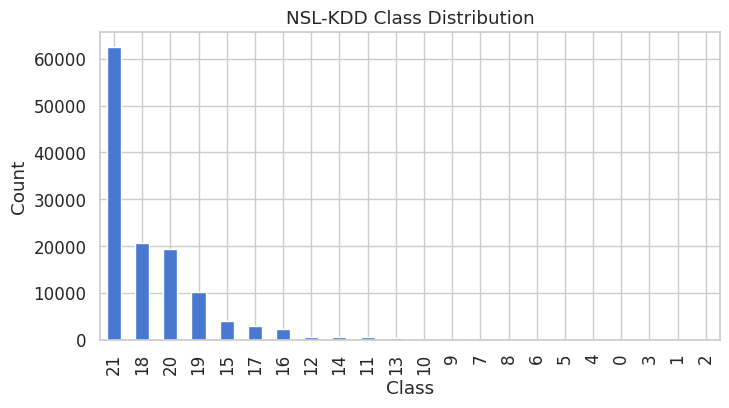

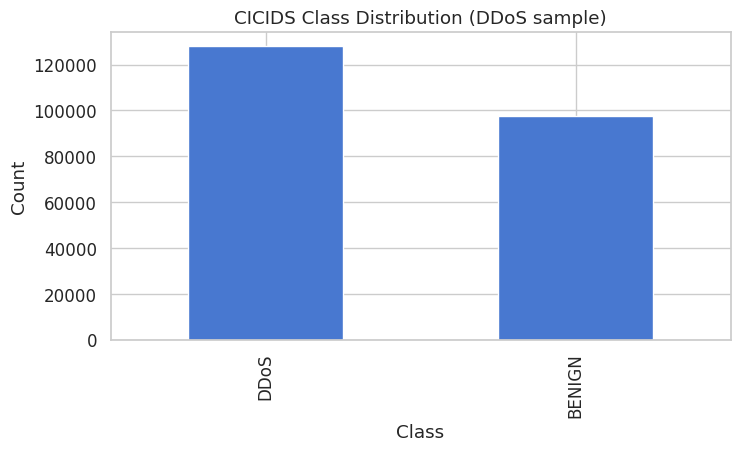

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(df, label_col, title):
    plt.figure(figsize=(8,4))
    df[label_col].value_counts().plot(kind='bar')
    plt.title(title)
    plt.ylabel("Count")
    plt.xlabel("Class")
    plt.show()

plot_class_distribution(nsl_train, "level", "NSL-KDD Class Distribution")
plot_class_distribution(cicids_ddos, cicids_ddos.columns[-1], "CICIDS Class Distribution (DDoS sample)")


In [24]:
print("===== NSL-KDD Dataset Summary =====")
print("Number of rows:", len(nsl_train))
print("Number of unique labels:", nsl_train['level'].nunique())
print("\nTop 5 frequent attack types:")
print(nsl_train['level'].value_counts().head(5))

===== NSL-KDD Dataset Summary =====
Number of rows: 125973
Number of unique labels: 22

Top 5 frequent attack types:
level
21    62557
18    20667
20    19339
19    10284
15     3990
Name: count, dtype: int64


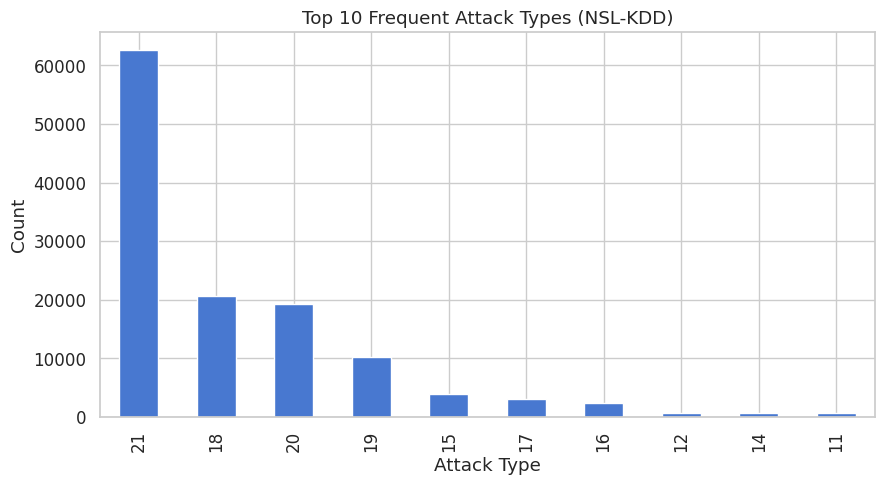

In [26]:
plt.figure(figsize=(10,5))
nsl_train['level'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Frequent Attack Types (NSL-KDD)")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.show()